In [11]:
#import library
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import tecplot_io as tec
import h5py
import os

In [12]:
#declare working directory
path = 'd:\post\Pitch_test'
os.chdir(path)
print('Current Working directory: ' + os.getcwd())

Current Working directory: d:\post\Pitch_test


In [13]:
#Declare some variable
#dt = 0.3150659270686558 
dt = 0.2941315855
nturbinex = 4
nturbiney = 4
nturbine = 16
#Diameter of turbine
D = 80
#Other variable
Sx = 7
Sy = 7
#Power density
Power_density = []
#Time variable
time = []
#Mean velocity
U = 11.5258407161
#frequency of wave
#omega = 0.0498561155567
omega = 0.42723635380725111
#wave period
T = 2*np.pi/omega
#turbine hub height
H_hub = 70.0
#Rotational angular period
T_turb = 42.84
#wave period
T_wave = 14.706579276758511

In [14]:
fid = open('log.uref','r')
content=fid.readlines()
# Turbine_           1 :angvel=   50.735637598099999      , TSR=   4.4059452767309510      , Uref=  0.86364504796591524
196034763     

nline = len(content)
nt = nline / nturbine
data=np.zeros((nline,4))

for i in range(int(nt)):
    for j in range(nturbine):
        i2 = nturbine * i + j
        value=content[i2].split()
        #print(value)
        data[i2,0]=(i+1)*dt
        data[i2,1]=value[3] # angvel
        data[i2,2]=value[6] # TSR
        data[i2,3]=value[9] # Uref
fid.close()

np.savetxt('uref.dat', data)
fid = open('log.cthrust','r')
content=fid.readlines()
# Thrust=  0.10233803188671066      , Torque=   6.1668522808625047E-003 , C_Thrust=  0.38109671967396186      , Power=   6.3533464098887757E-002 , C_Power=  0.12840488196034763     

nline = len(content)
nt = nline / nturbine
data=np.zeros((int(nturbine*nt),6))
for i in range(int(nt)):
    for j in range(nturbine):
      i2 = nturbine * i + j
      value=content[i2].split()
      #print(value)
      data[i2,0]=(i+1)*dt # time
      data[i2,1]=value[1] # thrust
      data[i2,2]=value[4] # torque
      data[i2,3]=value[7] # c_thrust
      data[i2,4]=value[10] # power
      data[i2,5]=float(value[13])*1.0 # c_power
fid.close()

np.savetxt('coeff.dat', data)
#Data Frame
data = pd.read_csv('coeff.dat', sep = '\s+', header = None)
data = pd.DataFrame(data)
x = data[4] #Turbine power
y = data[0] #time variable
#rearrange series to array multidimensional
x = np.array(x)
x = x.reshape([int(nt), nturbine])
x = x.reshape([int(nt), nturbiney, nturbinex])
#Normalized time variable
for i in range(0, int(len(y)), 16):
    #time.append(x[i]*(U/H_hub)) #Using U/H_hub
    #time.append(y[i]/T_turb)           #Using T_turb
    time.append(y[i]/T_wave)           #Using T_wave

#calculate power density
power_density = x/(Sx*Sy*D)
#power_density_average = np.mean(power_density, axis = 1)
power_density_average_pitch = np.mean(power_density, axis = 2)[:,0]

In [15]:
print('Current Working directory: ' + os.getcwd())
fid = open('log_hhall.dat','r')
content=fid.readlines()
# Turbine_           1 :angvel=   50.735637598099999      , TSR=   4.4059452767309510      , Uref=  0.86364504796591524
196034763     

nline = len(content)
print(nline)
hh=np.zeros((nline,1))

for i in range(int(nline)):
    value=content[i].split()
    hh[i,0]=value[2] # angvel
    #print(value[2])
fid.close()

np.savetxt('hh.dat', hh)

Current Working directory: d:\post\Pitch_test
15000


In [16]:
path = 'd:\post\Fixed_new'
os.chdir(path)
print('Current Working directory: ' + os.getcwd())
#Data Frame
data = pd.read_csv('coeff.dat', sep = '\s+', header = None)
data = pd.DataFrame(data)
x = data[4] #Turbine power
#rearrange series to array multidimensional
x = np.array(x)
#x = x.reshape([int(len(data)/nturbine), nturbine])
x = x.reshape([int(len(data)/nturbine), nturbiney, nturbinex])
#calculate power density
power_density = x/(Sx*Sy*D)
#power_density_average_pitch = np.mean(power_density, axis = 1)
power_density_average = np.mean(power_density, axis = 2)[:,0]
print(len(power_density_average))

Current Working directory: d:\post\Fixed_new
15000


In [17]:

path = 'd:\post\SWAY'
os.chdir(path)
print('Current Working directory: ' + os.getcwd())
#Data Frame
data = pd.read_csv('coeff.dat', sep = '\s+', header = None)
data = pd.DataFrame(data)
x = data[4] #Turbine power
#rearrange series to array multidimensional
x = np.array(x)
#x = x.reshape([int(len(data)/nturbine), nturbine])
x = x.reshape([int(len(data)/nturbine), nturbiney, nturbinex])
print(x[0,0,:])
#calculate power density
power_density = x/(Sx*Sy*D)
#power_density_average_sway = np.mean(power_density, axis = 1)
power_density_average_sway = np.mean(power_density, axis = 2)[:,0]
print(power_density_average_sway.shape)


Current Working directory: d:\post\SWAY
[582.01141782 491.77746329 608.27745623 587.69342512]
(15000,)


In [18]:
path = 'd:\post\Wave_no'
os.chdir(path)
print('Current Working directory: ' + os.getcwd())
#Data Frame
data = pd.read_csv('coeff.dat', sep = '\s+', header = None)
data = pd.DataFrame(data)
x = data[4] #Turbine power
#rearrange series to array multidimensional
x = np.array(x)
#x = x.reshape([int(len(data)/nturbine), nturbine])
x = x.reshape([int(len(data)/nturbine), nturbiney, nturbinex])
print(x[0,0,:])
#calculate power density
power_density = x/(Sx*Sy*D)
#power_density_average_sway = np.mean(power_density, axis = 1)
power_density_average_flat = np.mean(power_density, axis = 2)[:,0]
print(power_density_average_flat.shape)

Current Working directory: d:\post\Wave_no
[ 851.97039157  917.03496158 1003.23939613  840.68012982]
(15000,)


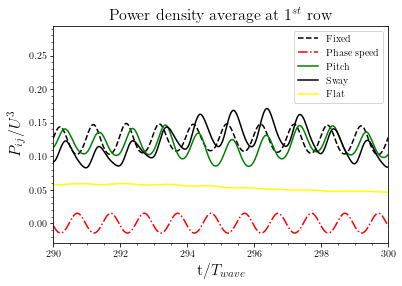

In [21]:
#plot
%matplotlib inline
mpl.rcParams['font.family'] = 'san-serif'
plt.rcParams['text.usetex'] = True
#plt.style.use('classic')
fig, ax = plt.subplots()
plt.plot(time, power_density_average,time, -hh*1e-02,\
         time, power_density_average_pitch[0:len(time)],\
         time, power_density_average_sway[0:len(time)],\
         time, power_density_average_flat[0:len(time)])
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[1].set_color("red")
plt.gca().get_lines()[2].set_color("green")
plt.gca().get_lines()[3].set_color("black")
plt.gca().get_lines()[4].set_color("yellow")
plt.gca().get_lines()[0].set_linestyle("--")
plt.gca().get_lines()[1].set_linestyle("-.")
plt.gca().get_lines()[2].set_linestyle("-")
plt.gca().get_lines()[3].set_linestyle("-")
plt.gca().get_lines()[4].set_linestyle("-")

ax.legend(['Fixed','Phase speed','Pitch', 'Sway', 'Flat'], loc='upper right')
ax.set_xlabel('t/$T_{wave}$', fontsize=16)
ax.set_ylabel('$P_{ij}/U^{3}$', fontsize = 16)
ax.set_title('Power density average at $1^{st}$ row', fontsize=16)
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.xlim([290,300])
#plt.ylim([-0.02,0.16])
plt.show()